Year? 2021
Month? 12
Day? 24
    hour    temp(F)   humidity         AQI        PM1      PM2.5       PM10
0      0  42.206897  51.206897   74.827586  15.105862  23.448276  26.645172
1      1  42.333333  51.366667   81.466667  17.470000  26.582333  30.720667
2      2  41.266667  52.500000   91.900000  20.154000  31.453333  37.000333
3      3  39.966667  54.133333  100.666667  22.989000  35.400000  41.405667
4      4  39.600000  55.333333  112.833333  26.356333  40.306000  48.979000
5      5  39.000000  56.666667  114.766667  26.774000  41.073667  50.033667
6      6  37.900000  58.800000  121.466667  28.334333  43.830000  54.793667
7      7  38.233333  62.100000  125.766667  28.790000  45.567667  57.950667
8      8  38.266667  62.200000  128.666667  29.682667  46.765000  59.567000
9      9  37.233333  65.066667  132.166667  30.250000  48.140333  61.433000
10    10  37.500000  66.933333  129.600000  29.545333  47.121000  60.071000
11    11  39.033333  65.200000  121.566667  27.856667  43.7

Text(0, 0.5, 'PM10')

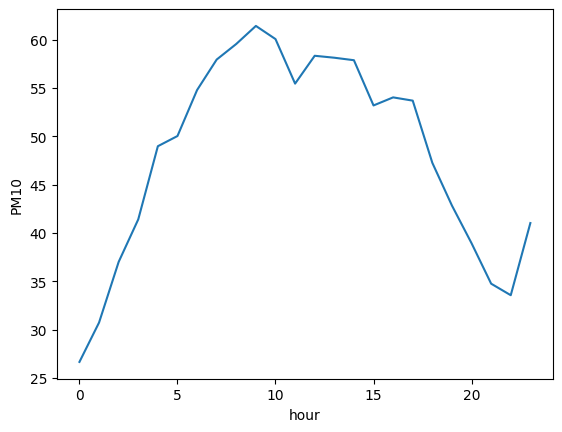

In [49]:
from pandas.tseries.offsets import MonthBegin
from tables import is_hdf5_file
from pandas.plotting import bootstrap_plot
import pandas as pd

# Day the User Wants to See
year = input('Year? ')
month = input('Month? ')
day =  input('Day? ')
df = pd.read_csv('clean_'+ year + month + day +'.csv')

# Table
print(df)

# Mean Values of Categories
mean_pm2 = df['PM2.5'].mean()
mean_pm10 = df['PM10'].mean()

# Index For PM2.5
if mean_pm2 <= 12:
  bphi = 12
  bplo = 0
  ihi = 50
  ilo = 0
elif mean_pm2 <= 35.4:
  bphi = 35.4
  bplo = 12.1
  ihi = 100
  ilo = 51
elif mean_pm2 <= 55.4:
  bphi = 55.4
  bplo = 35.5
  ihi = 150
  ilo = 101
elif mean_pm2 <= 150.4:
  bphi = 150.4
  bplo = 55.5
  ihi = 200
  ilo = 151
elif mean_pm2 <= 250.4:
  bphi = 250.4
  bplo = 150.5
  ihi = 300
  ilo = 201
elif mean_pm2 <= 350.4:
  bphi = 350.4
  bplo = 250.5
  ihi = 400
  ilo = 301
elif mean_pm2 <= 500.4:
  bphi = 500.4
  bplo = 350.5
  ihi = 500
  ilo = 401

index_pm2 = ((ihi - ilo)/(bphi - bplo)) * (mean_pm2 - bplo) + ilo

print('PM2.5 Index:', index_pm2)
# Index For PM10
if mean_pm10 <= 54:
  bphi = 54
  bplo = 0
  ihi = 50
  ilo = 0
elif mean_pm10 <= 154:
  bphi = 154
  bplo = 55
  ihi = 100
  ilo = 51
elif mean_pm10 <= 254:
  bphi = 254
  bplo = 155
  ihi = 150
  ilo = 101
elif mean_pm10 <= 354:
  bphi = 354
  bplo = 255
  ihi = 200
  ilo = 151
elif mean_pm10 <= 424:
  bphi = 424
  bplo = 355
  ihi = 300
  ilo = 201
elif mean_pm10 <= 504:
  bphi = 504
  bplo = 425
  ihi = 400
  ilo = 301
elif mean_pm10 <= 604:
  bphi = 604
  bplo = 505
  ihi = 500
  ilo = 401

index_pm10 = ((ihi - ilo)/(bphi - bplo)) * (mean_pm10 - bplo) + ilo

print('PM10 Index:', index_pm10)

# AQI For That Day
if index_pm10 > index_pm2:
  print('AQI:', index_pm10)
elif index_pm2 > index_pm10:
  print('AQI:', index_pm2)
else:
  print('AQI:', index_pm2)

# Plotting Points
import matplotlib.pyplot as plt
hour = df.loc[:,'hour']
pm10 = df.loc[:,'PM10']
plt.plot(hour, pm10)
plt.xlabel('hour')
plt.ylabel('PM10')
